<h2>The RMSProp Algorithm</h2>
<p>RMSProp follows the adaptive learning rate approach. It deals with the vanishing gradient problem, by using a moving average of squared gradients to normalize the gradient itself.</p>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We'll split the data into train and test sets, and standard normalize the sets.

In [2]:
cancer=load_breast_cancer()

Xtrain,Xtest,ytrain,ytest=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=56)

In [3]:
scaler= StandardScaler()
Xtrain=scaler.fit(Xtrain).transform(Xtrain)
Xtest=scaler.fit(Xtest).transform(Xtest)

Adding bias column.

In [4]:
one=np.ones((Xtrain.shape[0],1))
Xtrain=np.concatenate((Xtrain,one),axis=1)
np.shape(Xtrain)

(426, 31)

Defining the basic units of a logistic regression model's computation graph: a=g(z),L(a,y),dw

In [5]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [6]:
def prediction(X, w):
    Z=np.dot(X,w)
    a=sigmoid(Z)
    return a

In [7]:
def loss_function(X, y, w):
    m=X.shape[0]
    n=X.shape[1]
    a=prediction(X,w)
    y=y.reshape((m,1))
    loss=-(y*np.log(a) + (1-y)*np.log(1-a))
    L=(1/m)*np.sum(loss)
    
    return L

In [8]:
def compute_gradient(X, y, w):
    m=X.shape[0]
    n=X.shape[1]
    a=prediction(X,w)
    y=y.reshape((m,1))
    
    dz=a-y
    dw=(1/m)*np.dot(X.T,dz)
    
    return dw

<p>We'll initialize a weight vector of zeros, except the bias column which can be 1. We'll also initialize the gradient accumulator G to 0.</p>

In [9]:
def RMSProp(X,y,eta,max_iter,batch_size,epsilon,alpha):
    w=np.zeros((X.shape[1],1))
    w[X.shape[1]-1]=1
    G=0
    
    loss=np.zeros(max_iter)
    for i in range(max_iter):
        index=np.random.choice(X.shape[0],batch_size)
        loss[i]=loss_function(X,y,w)

        g=compute_gradient(X[index],y[index],w)
        g2=np.square(g)
        
        G=alpha*G + (1-alpha)*g2
        w=w-(eta/np.sqrt(G+epsilon))*g
        
    return (w,loss)

Setting learning rate=0.1, alpha=0.9, epsilon=1e-8, iterations=100 and batch size=4:

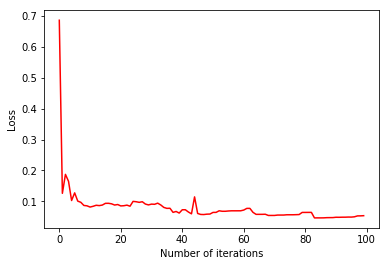

In [28]:
eta=0.1
alpha=.9
max_iter=100
batch_size=5
epsilon= 1e-8

(w,loss)=RMSProp(Xtrain,ytrain,eta,max_iter,batch_size,epsilon,alpha)

plt.plot(loss,color='red')
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.show()

In [29]:
one=np.ones((Xtest.shape[0],1))
Xtest=np.concatenate((Xtest,one),axis=1)

In [30]:
def f1score(X,w,y):
    a=prediction(X,w)
    y=y.reshape((X.shape[0],1))
    a= a>=0.5
    p= np.sum((a==1)*(a==y))/np.sum(a==1) #precision
    r= np.sum((a==1)*(a==y))/np.sum(y==1) #recall
    return 2*p*r/(p+r)
    
    
x=f1score(Xtest,w,ytest)
print(x*100)

98.34254143646407
